##################################################################################################################################################################################$$Player-Market-Valuation$$ 
Football clubs face the challenge of predicting the market value of professional football players during transfer windows, which involves substantial financial investments. While Transfermarkt.com,Transfermarkt,CIES Football Observatory,Soccerex,Forbes,Goal.com relies on football experts' crowdsourcing to determine players' values, such approaches are infrequently updated and prone to human errors. As a result, data scientists worldwide have turned to a data-driven approach to create datasets and develop estimating methods using statistical analysis. In this project, I constructed a dataset consisting of 16060 players from 933 World-Wide Football teams and estimated players' market values using regression analysis. 
                                      

In [2]:
#Firstly I need to import libraries and setting some default display options

# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


import statsmodels.api as sm
from sklearn import metrics
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

$$WEB-SCRAPING$$

First we need required datas. For this project, I obtained data from the website "Sofifa" {Sofifa is a website that provides comprehensive information about professional football players, including their performance statistics, personal details, and transfer history. The website is dedicated to the FIFA video game series and is widely used by gamers, football fans, and football clubs alike. Sofifa provides up-to-date player ratings, which are calculated based on a player's recent performances and are used by the FIFA video game series to determine player abilities and rankings}.
I used a technique called "web scraping" to collect data from Sofifa and convert it into a useful format. Web scraping involves extracting data from websites and converting it into a format like a data frame.



In [3]:
player_list = []

# Set up the Selenium driver
driver = webdriver.Chrome()

# Loop over multiple pages, Main page includes players characteristics data and 
# each page has 60 players. So I need to build loop to get all players from sofifa. 
# I used BeautifulSoup library to scrape data.
for i in range(0, 40000, 60):
    # Load the webpage
    url = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    driver.get(url)

    # Wait for the table to load
    wait = WebDriverWait(driver, 10)
    table = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "table.table tbody")))

    # Extract the page source
    page_source = driver.page_source

    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, "lxml")

    # Find all the rows in the table
    rows = soup.find_all("tr")

    # Extract the data from each row
    for row in rows:
        cells = row.find_all('td')
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        player_list.append(cells_sub)

# Convert the list of data to a DataFrame
result = pd.DataFrame(player_list)

# Close the driver
driver.quit()

In [4]:
# After scraping process, I checked number of rows and dropped duplicate rows.
#  Finally I scraped 18674 players from sofifa web page.
print("Number of All Rows")
print(len(result));
print("")
print("Number of Rows Unique")
result.drop_duplicates(subset=None, keep="first", inplace=True)
print(len(result))

Number of All Rows
40641

Number of Rows Unique
18837


In [5]:
#Saving result data frame as a Pickle File
result.to_pickle("raw-scrape")

Data cleaning and organizing is an essential step in any data analysis project. It involves identifying and correcting errors, inconsistencies, and missing values in the data to ensure that it is accurate and reliable. In this project, I performed data cleaning on the dataset to prepare it for analysis.

Split columns,
Remove unwanted characters (such as \n)
Converting height column to cm
Converting weight column to kg
Converting Value, Wage and Release_Clause to decimal money. (Including €, M and K characters)
Deleting some rows that columns is blank
Converting International Reputation column (5 ★) to integer (5)
Converting all numeric columns to integer or float

By performing data cleaning, I was able to ensure that the dataset was accurate, consistent, and free of errors, allowing me to conduct meaningful analysis and draw reliable conclusions from the data.

Overall, data cleaning is a critical step in the data analysis process, and it ensures that the data is reliable and accurate, which is essential for making informed decisions based on the data.

In [7]:
# Getting table name (header)
table_players = soup.find("table",attrs={"class":"table table-hover persist-area"})
header_players = table_players.find_all("th")
column_name_players = []
for row in header_players:
    column_name_players.append(row.text)
column_name_players

['',
 'Name',
 'Age',
 'Overall rating',
 'Potential',
 'Team & Contract',
 'ID',
 'Height',
 'Weight',
 'foot',
 'Best overall',
 'Best position',
 'Growth',
 'Value',
 'Wage',
 'Release clause',
 'Total attacking',
 'Crossing',
 'Finishing',
 'Heading accuracy',
 'Short passing',
 'Volleys',
 'Total skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long passing',
 'Ball control',
 'Total movement',
 'Acceleration',
 'Sprint speed',
 'Agility',
 'Reactions',
 'Balance',
 'Total power',
 'Shot power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long shots',
 'Total mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Total defending',
 'Marking',
 'Standing tackle',
 'Sliding tackle',
 'Total goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total stats',
 'Base stats',
 'International reputation',
 'Pace / Diving',
 'Shooting / Handling',
 'Passing / Kicking',
 'Dribbling / Reflexes',
 'Defending

In [10]:
# Setting columns names
new_column_name_players = [
 'Name',
 'Age',
 'Overall',
 'Potential',
 'Team',
 'Height',
 'Weight',
 'Foot',
 'Best_Overall',
 'Position',
 'Growth',
 'Value',
 'Wage',
 'Release_Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

In [ ]:
result = pd.read_pickle("raw-scrape")

#Data Cleaning

result = result[0].str.split(',',expand=True)


result[1] = result[1].str.replace("\n ","")

chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()

result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]

result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68]],axis=1, inplace=True)

mask_loan = result[6].isnull()

result_loan = result.loc[mask_loan].shift(-1, axis=1)

result_loan.drop_duplicates(subset=[6], keep="first", inplace=True)

result_loan.drop(result_loan.columns[[5,6,66,67,68]],axis=1, inplace=True)

result_WoLoan.columns = new_column_name_players

result_loan.columns = new_column_name_players

result_master = pd.concat([result_WoLoan,result_loan]).reset_index()
del result_master["index"]

result_master.drop_duplicates(subset=None, keep="first",inplace=True)

result_master["PHY"] = result_master["PHY"].str.extract(r"(\d+)")

result_master

In [ ]:
#Cleaning Height,Weight and age attr.

result_master = result_master[~result_master["Height"].str.contains("~")]
result_master = result_master[~result_master["Age"].str.contains("\n")]
result_master = result_master[result_master["Height"].str.contains("'")]

result_master["Height"] = result_master["Height"].str.extract(r"(\d+)")
result_master["Weight"] = result_master["Weight"].str.extract(r"(\d+)")
result_master

In [ ]:
#Cleaning to every money related column to decimal
result_master["Value"] = result_master["Value"].str.replace("€","")
result_master["Value"] = result_master["Value"].str.replace("M","")
result_master.loc[result_master["Value"].str.contains("K"),"Value"]=result_master["Value"].str.split("K").str[0].astype(float)/1000
result_master["Value"] = round(result_master["Value"].astype(float),2)
result_master = result_master.loc[result_master["Value"]>0]

#Cleaning Wage column and convert to decimal
result_master["Wage"] = result_master["Wage"].str.replace("€","")
result_master.loc[result_master["Wage"].str.contains("K"),"Wage"]=result_master["Wage"].str.split("K").str[0].astype(float)*1000
result_master["Wage"] = round(result_master["Wage"].astype(float)/1000000,5)

#Cleaning Release_Clause column and convert to decimal
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("€","")
result_master["Release_Clause"] = result_master["Release_Clause"].str.replace("M","")
result_master.loc[result_master["Release_Clause"].str.contains("K"),"Release_Clause"]=result_master["Release_Clause"].str.split("K").str[0].astype(float)/1000
result_master["Release_Clause"] = round(result_master["Release_Clause"].astype(float),2)
result_master

In [ ]:
#Deleting some rows that composure columns is blank (Legend Players)
result_master = result_master.loc[result_master["Composure"]!=" "]
result_master = result_master[result_master["Base_Stats"]!=' ']

#Cleaning to IR column
result_master["Int_Reputation"]=result_master["Int_Reputation"].str[:-1]

In [ ]:
#Converting to int dtypes

cols_to_convert=['Age',
 'Overall',
 'Potential',
 'Height',
 'Weight',
 'Best_Overall',
 'Growth',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading_Accuracy',
 'Short_Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK_Accuracy',
 'Long_Passing',
 'Ball_Control',
 'Movement',
 'Acceleration',
 'Sprint_Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot_Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long_Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing_Tackle',
 'Sliding_Tackle',
 'Goalkeeping',
 'GK_Diving',
 'GK_Handling',
 'GK_Kicking',
 'GK_Positioning',
 'GK_Reflexes',
 'Total_Stats',
 'Base_Stats',
 'Int_Reputation',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY']

for col in cols_to_convert:
    result_master[col] = result_master[col].astype('int')

In [ ]:
#Checking columns dtypes
result_master.info()

In [ ]:
#Saving Final Player List as Pickle
result_master.to_pickle("scrape-final")
player_list= pd.read_pickle("scrape-final")
player_list

# Exploratory Data Analyis

After completing data cleaning, the next step in any data analysis project is Exploratory Data Analysis (EDA). EDA is a process that involves examining and understanding the data by generating visualizations, identifying patterns, and testing hypotheses. In this project, I performed EDA on the cleaned dataset to gain insights into the data and identify relationships between variables.


In [13]:
player_list= pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/Valuation/scrape-final")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,30.00,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,21,81,86,Feyenoord,175,68,Right,83,CM,5,39.50,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.19,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,3.60,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,30.50,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,21,49,62,Incheon United,188,83,Right,51,CB,13,0.11,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.70,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.32,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,18,70,86,Manchester United,180,72,Right,70,LW,16,4.00,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [14]:
# Diffrent Teams
player_list.Team.value_counts()

River Plate             86
Liverpool               76
Universidad Católica    58
Manchester United       45
Aucas                   45
                        ..
Novara                   1
Akhmat Grozny            1
Limerick                 1
Albirex Niigata          1
Catania                  1
Name: Team, Length: 933, dtype: int64

In [18]:
#Top 5 Valuable Player
player_list.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
84,K. Mbappé,23,Paris Saint Germain,190.5
95,F. de Jong,25,FC Barcelona,116.5
38,Vinícius Jr.,21,Real Madrid,109.0
186,K. De Bruyne,31,Manchester City,107.5
429,Rúben Dias,25,Manchester City,107.5


In [17]:
#Top 5 Rating Player
player_list.nlargest(5,columns="Overall")[["Name","Age","Team","Overall"]]

,Name,Age,Team,Overall
15,L. Messi,35,Paris Saint Germain,91
84,K. Mbappé,23,Paris Saint Germain,91
186,K. De Bruyne,31,Manchester City,91
205,K. Benzema,34,Real Madrid,91
236,R. Lewandowski,33,FC Barcelona,91


In [23]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.mean().sort_values(ascending=False).head(5))

,Value
Team,
Paris Saint Germain,42.553182
Manchester City,36.895385
Real Madrid,29.820667
FC Barcelona,27.236970
FC Bayern München,25.510385


In [24]:
#Top 5 Clup (Mean Value)

pd.DataFrame(player_list.groupby("Team").Value.sum().sort_values(ascending=False).head(5))

,Value
Team,
Liverpool,961.86
Manchester City,959.28
Paris Saint Germain,936.17
FC Barcelona,898.82
Real Madrid,894.62


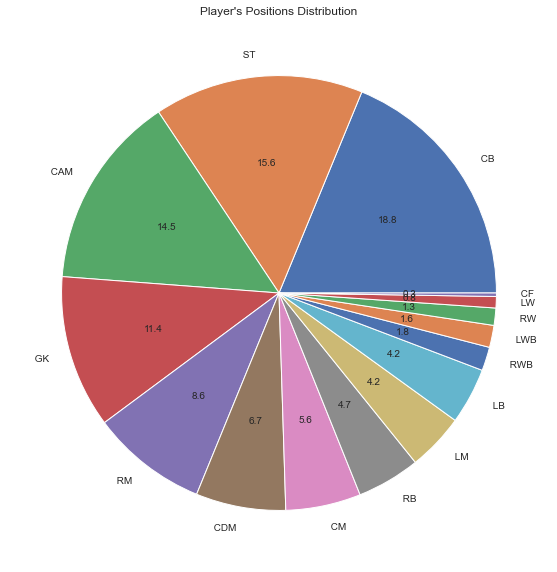

In [29]:
# Player’s Position Distribution
plt.figure(figsize=(10,10))
loc=player_list.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

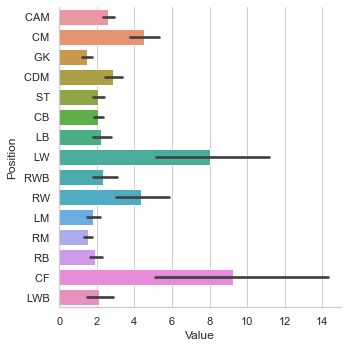

In [30]:
# Mean Value of Each Position
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=player_list)
plt.show()

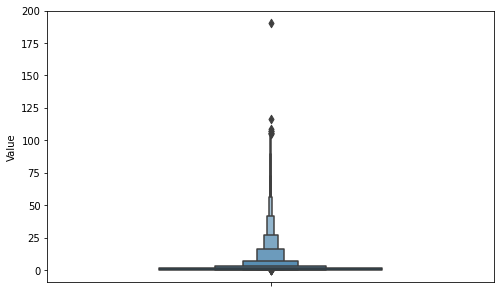

In [25]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='Value', data=player_list, width=0.5)
plt.show()

C:\Users\adhna\AppData\Local\Temp\ipykernel_23368\515352127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')


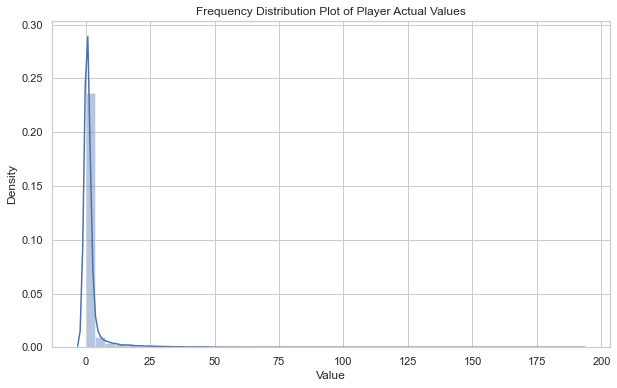

In [26]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

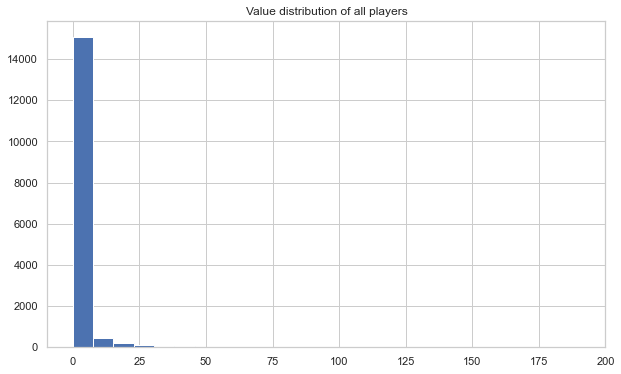

In [27]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

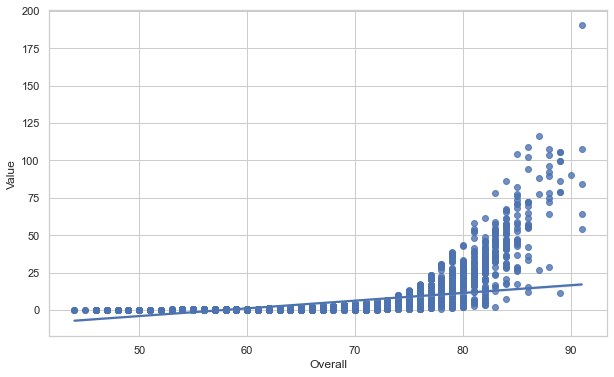

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=player_list)
plt.show()

C:\Users\adhna\AppData\Local\Temp\ipykernel_23368\2986765892.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(player_list.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)


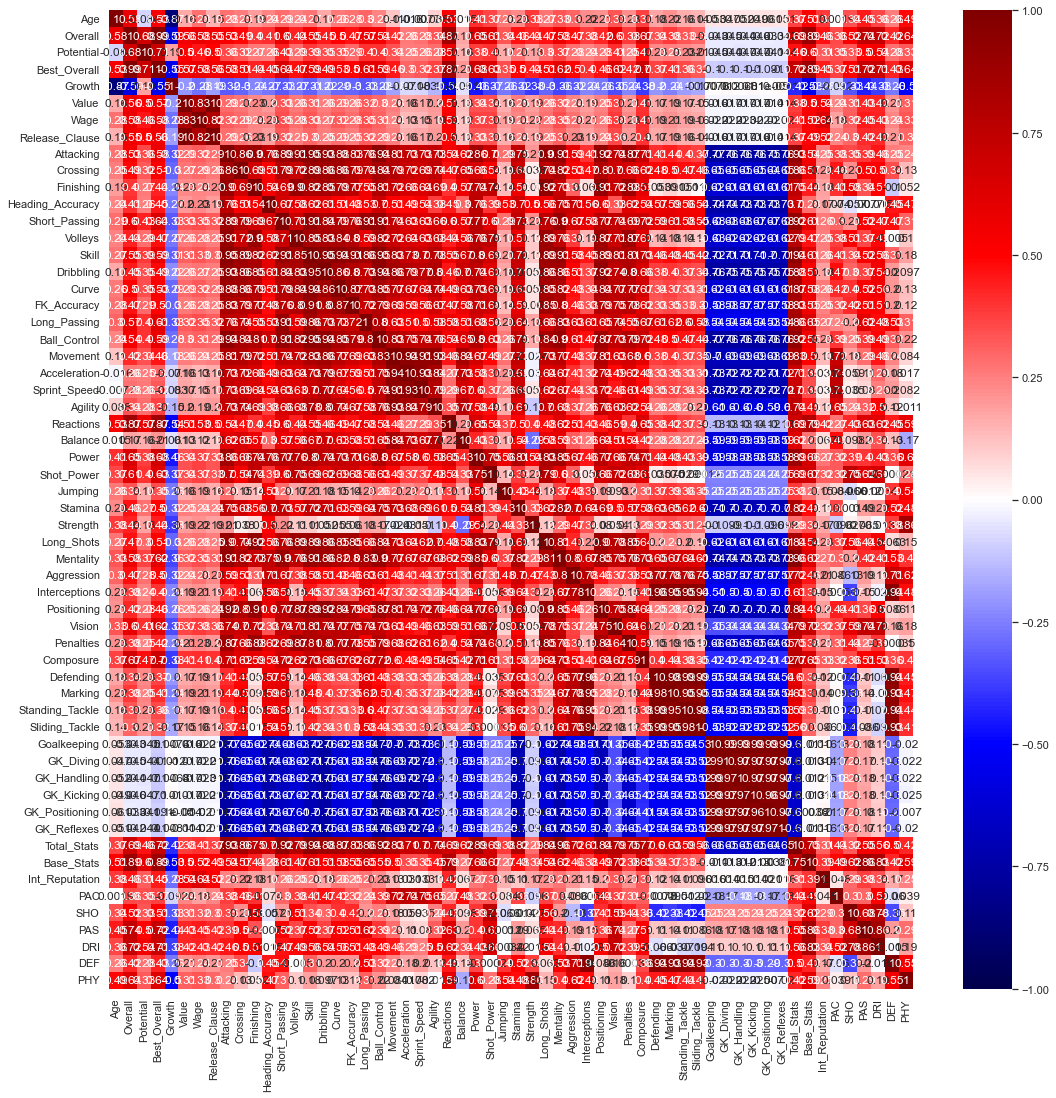

In [35]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 18))
sns.set(style="whitegrid")
sns.heatmap(player_list.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

After completing data cleaning and exploratory data analysis, the next step in the data analysis process is to build a model. In this project, I used a regression model to estimate the market value of football players based on their performance statistics.

Regression models are a type of predictive model that uses statistical techniques to analyze the relationships between variables and make predictions about future outcomes. In this project, I used a linear regression model to estimate the market value of football players based on their performance statistics, such as goals scored, assists, and minutes played.

The regression model involved several steps, including:

Feature selection: I selected the most relevant features from the dataset that would have the most significant impact on the player's market value.

Splitting the data: I split the data into training and testing sets, where the model was trained on the training set and evaluated on the testing set.

Building the model: I trained a linear regression model on the training data, using the selected features to predict the players' market value.

Evaluating the model: I evaluated the performance of the model on the testing data, measuring metrics such as mean squared error and R-squared to determine how well the model performed in predicting the market values.

By using a regression model, I was able to estimate the market value of football players based on their performance statistics, providing valuable insights for football clubs, agents, and scouts in making informed decisions during transfer windows.

In [49]:
#Changing columns order
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,30.00,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,39.50,21,81,86,Feyenoord,175,68,Right,83,CM,5,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,0.19,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,3.60,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,30.50,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,0.11,21,49,62,Incheon United,188,83,Right,51,CB,13,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,0.70,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,0.32,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,4.00,18,70,86,Manchester United,180,72,Right,70,LW,16,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [50]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

C:\Users\adhna\AppData\Local\Temp\ipykernel_23368\3573284818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = player_list.corr()


,Value,Age,Overall,Potential,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.164331,0.561993,0.500093,0.565827,-0.203275,0.827287,0.995211,0.294396,0.267733,0.231515,0.196537,0.328701,0.258034,0.308801,0.257801,0.294556,0.257902,0.324190,0.295355,0.257190,0.164791,0.173720,0.203069,0.505401,0.126275,0.341633,0.337554,0.163288,0.250312,0.192762,0.259675,0.316416,0.237351,0.188585,0.246096,0.365307,0.205739,0.405442,0.169596,0.190755,0.165469,0.145393,-0.015972,-0.017038,-0.017087,-0.016554,-0.014081,-0.014073,0.382110,0.501744,0.543859,0.239318,0.307752,0.425384,0.424724,0.212301,0.310513
Age,0.164331,1.000000,0.578253,-0.084337,0.529950,-0.871325,0.280022,0.149089,0.277947,0.251012,0.192667,0.238840,0.286837,0.243116,0.265677,0.165136,0.259382,0.280016,0.300922,0.236476,0.111120,-0.015661,-0.007719,0.087798,0.530735,0.014912,0.413209,0.366120,0.258979,0.229555,0.383514,0.266595,0.331436,0.302843,0.221456,0.213726,0.332066,0.225028,0.374766,0.176835,0.217195,0.163042,0.143001,0.052524,0.047112,0.051631,0.048609,0.061300,0.050697,0.373442,0.508305,0.383536,0.001866,0.341046,0.446857,0.363885,0.255703,0.485853
Overall,0.561993,0.578253,1.000000,0.683262,0.989523,-0.590123,0.583692,0.552593,0.533523,0.489986,0.396365,0.410274,0.596230,0.435703,0.546098,0.450262,0.500048,0.466196,0.573596,0.539897,0.417548,0.260394,0.275516,0.340296,0.868910,0.174518,0.649059,0.605034,0.335180,0.461546,0.436104,0.468546,0.577399,0.469669,0.377378,0.424925,0.595125,0.384851,0.673209,0.342777,0.384620,0.330586,0.298760,-0.042663,-0.044958,-0.043830,-0.046111,-0.033342,-0.042115,0.688898,0.891985,0.462917,0.355351,0.517217,0.736634,0.722765,0.422627,0.638384
Potential,0.500093,-0.084337,0.683262,1.000000,0.707019,0.186271,0.459013,0.502288,0.356290,0.320810,0.265254,0.255602,0.431183,0.286242,0.387338,0.345610,0.346109,0.293229,0.403239,0.401049,0.341555,0.253017,0.259823,0.282307,0.571375,0.157656,0.377724,0.399670,0.171710,0.274262,0.182999,0.296151,0.373011,0.280954,0.240358,0.278553,0.410545,0.249319,0.471616,0.232008,0.248590,0.228050,0.209583,-0.045011,-0.043500,-0.047203,-0.046843,-0.040586,-0.043964,0.462008,0.604961,0.314591,0.349452,0.329097,0.499361,0.539580,0.275843,0.327873
Best_Overall,0.565827,0.529950,0.989523,0.707019,1.000000,-0.549758,0.579963,0.557363,0.576626,0.507820,0.437179,0.454177,0.642599,0.474018,0.586952,0.491977,0.530141,0.496148,0.613336,0.586251,0.458214,0.304091,0.320852,0.374029,0.873614,0.208049,0.683377,0.627144,0.349460,0.496702,0.439846,0.506342,0.616621,0.497188,0.398835,0.461637,0.620485,0.424338,0.701155,0.368060,0.409153,0.356313,0.323267,-0.101114,-0.102726,-0.101647,-0.103819,-0.090829,-0.099685,0.724035,0.889734,0.449296,0.368119,0.507053,0.724415,0.714258,0.432812,0.635097
Growth,-0.203275,-0.871325,-0.590123,0.186271,-0.549758,1.000000,-0.277892,-0.188200,-0.323962,-0.304608,-0.240059,-0.269447,-0.325532,-0.269786,-0.306553,-0.223736,-0.290175,-0.303091,-0.325973,-0.283050,-0.184200,-0.070631,-0.083453,-0.145759,-0.537440,-0.060514,-0.455724,-0.372220,-0.261157,-0.317805,-0.384475,-0.303023,-0.364511,-0.321336,-0.242038,-0.263785,-0.346864,-0.242185,-0.384409,-0.204711,-0.242679,-0.192684,-0.170277,0.007640,0.012398,0.006786,0.010254,-0.000011,0.008060,-0.416143,-0.531353,-0.275060,-0.091778,-0.332086,-0.439075,-0.375945,-0.263689,-0.496478
Wage,0.827287,0.280022,0.583692,0.459013,0.579963,-0.277892,1.000000,0.819355,0.318791,0.291575,0.237067,0.229837,0.348228,0.283298,0.330355,0.268100,0.321130,0.283244,0

In [51]:
#Correlation With Value (most correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.995211
Wage,0.827287
Best_Overall,0.565827
Overall,0.561993
Int_Reputation,0.543859
Reactions,0.505401
Base_Stats,0.501744
Potential,0.500093
PAS,0.425384


In [52]:
#Correlation With Value (least correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.203275
GK_Handling,-0.017087
GK_Diving,-0.017038
GK_Kicking,-0.016554
Goalkeeping,-0.015972
GK_Positioning,-0.014081
GK_Reflexes,-0.014073
Balance,0.126275
Sliding_Tackle,0.145393
Jumping,0.163288


In [76]:
# Slice data into faeture and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
Yb= player_list.loc[:,"Value"]

# fit model with target as player market value 
player_modelb = sm.OLS(Yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.192e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):                        0.00
Time:                        18:59:32   Log-Likelihood:                         -15969.
No. Observations:               16060   AIC:                                  3.204e+04
Df Residuals:                   16010   BIC:                                  3.242e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [79]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(Xb,Yb)
coeff_df = pd.DataFrame(regressor.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Overall,PAC,DEF,DRI,Height,PAS,PHY,Balance,Stamina,Volleys,Finishing,FK_Accuracy,Agility,Power,GK_Handling,GK_Kicking,Long_Passing,Positioning,Vision,Aggression,Sliding_Tackle,Weight,Shot_Power,Marking,Attacking,Reactions,Movement,Long_Shots,Curve,Total_Stats,Skill,Ball_Control,Strength,SHO,Mentality,Goalkeeping,Defending,GK_Reflexes,Jumping,GK_Diving,Crossing,Short_Passing,Penalties,Standing_Tackle,Heading_Accuracy,GK_Positioning,Sprint_Speed,Interceptions,Potential,Acceleration,Dribbling,Base_Stats,Composure,Best_Overall,Growth,Age
Coefficient,5.355422,0.630783,0.495827,0.016545,0.010909,0.010169,0.007803,0.006279,0.004258,0.004029,0.003608,0.002683,0.002489,0.001999,0.001876,0.00177,0.001719,0.001681,0.00163,0.00146,0.001246,0.001237,0.001113,0.000993,0.000473,0.000397,0.000244,0.000152,0.000135,-0.000083,-0.000104,-0.000108,-0.000136,-0.000295,-0.000325,-0.000374,-0.000428,-0.000477,-0.000552,-0.000601,-0.000605,-0.000884,-0.000903,-0.001007,-0.001392,-0.00146,-0.001838,-0.001937,-0.002354,-0.002612,-0.002613,-0.002852,-0.002984,-0.003198,-0.004237,-0.005642,-0.011219,-0.019398,-0.021184


After analyzing the distribution plot,I needed to reduce the number of features in the dataset. To do this, I used a correlation matrix to identify the columns that are highly correlated with the target column (Value). Based on my analysis, I selected the following columns for predicting Value: Overall, Age, Int_Reputation, Growth, Release_Clause, Wage



In [53]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Value','Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]

player_list_selected_features.corr()

,Value,Overall,Age,Int_Reputation,Growth,Release_Clause,Wage
Value,1.000000,0.561993,0.164331,0.543859,-0.203275,0.995211,0.827287
Overall,0.561993,1.000000,0.578253,0.462917,-0.590123,0.552593,0.583692
Age,0.164331,0.578253,1.000000,0.383536,-0.871325,0.149089,0.280022
Int_Reputation,0.543859,0.462917,0.383536,1.000000,-0.275060,0.521249,0.636160
Growth,-0.203275,-0.590123,-0.871325,-0.275060,1.000000,-0.188200,-0.277892
Release_Clause,0.995211,0.552593,0.149089,0.521249,-0.188200,1.000000,0.819355
Wage,0.827287,0.583692,0.280022,0.636160,-0.277892,0.819355,1.000000


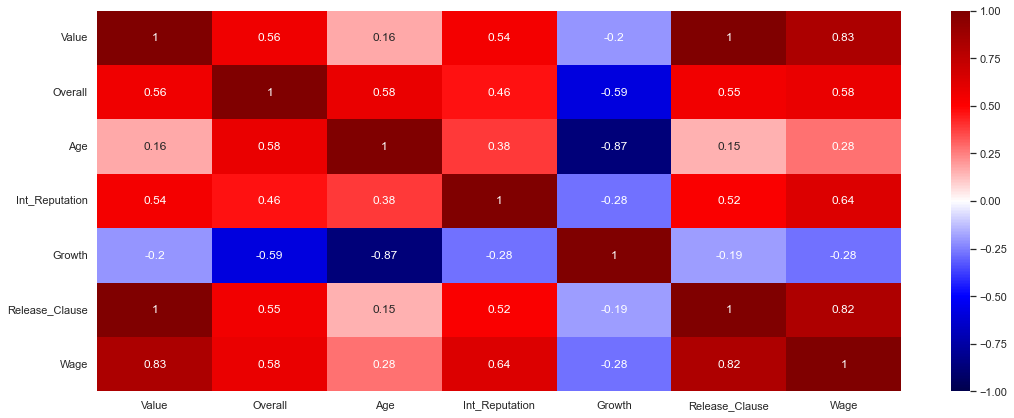

In [54]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1296x504 with 0 Axes>

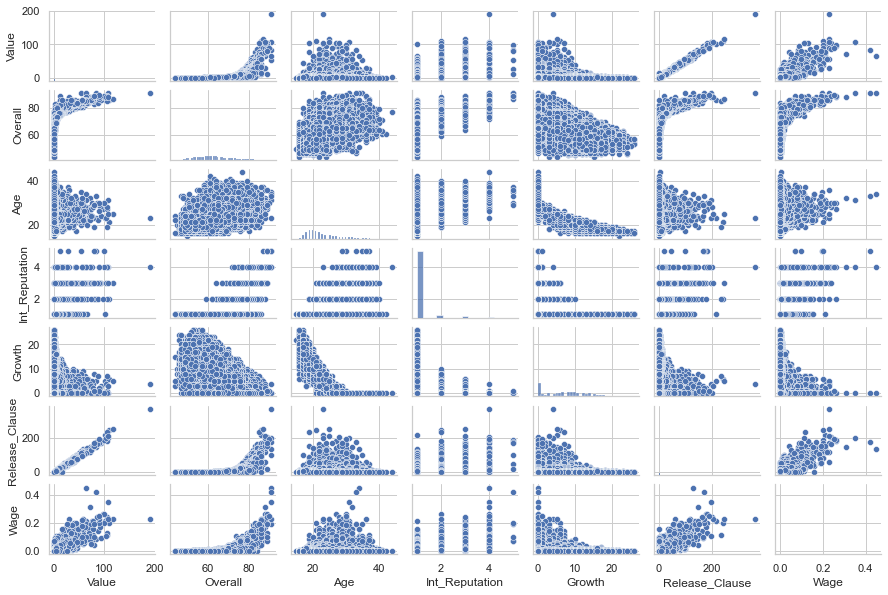

In [55]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [84]:
Xs= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause','Wage']]
Ys= player_list.loc[:,"Value"]

In [85]:
#Model based on most selected columns


player_model1 = sm.OLS(Ys, Xs, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          3.459e+05
Date:                Tue, 09 May 2023   Prob (F-statistic):                        0.00
Time:                        19:08:14   Log-Likelihood:                         -16070.
No. Observations:               16060   AIC:                                  3.215e+04
Df Residuals:                   16054   BIC:                                  3.220e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [86]:
# Now I have to split mY data as train, test and validation set. And run model
#again and finally compare Ridge, Lasso and Polynomial regression results.

X, X_test, Y, Y_test = train_test_split(Xs,Ys,test_size=0.2, random_state=10)

X_train, X_val, Y_train, Y_val = train_test_split(Xs,Ys, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

Xs_poly = poly.fit_transform(Xs.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, Y_train)
print(f'Linear Regression for all data R^2: {lm.score(Xs, Ys):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, Y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, Y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, Y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, Y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, Y_val):.3f}')
print("")


lm_lasso.fit(X_train,Y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, Y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, Y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, Y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, Y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, Y_val):.3f}')

Linear Regression for all data R^2: 0.992
Linear Regression for test data R^2: 0.992
Linear Regression for validation data R^2: 0.991

Ridge Regression for test data R^2: 0.984
Ridge Regression for validation data R^2: 0.985

Lasso Regression for test data R^2: 0.410102
Lasso Regression for validation data R^2: 0.415536

Degree 2 polynomial regression for test data R^2: 0.995
Degree 2 polynomial regression for validayion data R^2: 0.995


C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was d

In [83]:

# Get the coefficients of the polynomial regression model
coefficients = lm_poly.coef_

print(coefficients)

[ 4.13282387e-10 -4.32377345e-01  5.14280927e-01  1.27931047e+00
  1.48817049e-01 -5.35501750e-01 -1.43839192e+02  4.88458743e-03
 -5.76909149e-03  3.06658474e-02 -3.89530113e-04  1.34923676e-02
  2.30015276e+00 -1.02151587e-03 -1.05186323e-01 -1.30457011e-03
 -3.73785396e-03 -4.54167689e-01  1.82386994e-02 -4.31344162e-02
 -2.96271833e-03 -2.36039095e+00 -1.64150597e-03 -1.80771109e-03
 -1.31522911e+00 -2.62055136e-04 -1.16065208e-01 -1.11610722e+02]


In [88]:
intercept = lm_poly.intercept_
intercept

4.369473376070977

In [90]:
predictor_names = ['OV', 'AG', 'IR', 'GR', 'RC', 'WA']

# Create the polynomial regression equation string
equation = f'y = {intercept:.2f}'

for i, name in enumerate(predictor_names):
    equation += f' + {coefficients[i]:.2f}*{name}'

for i in range(len(predictor_names)):
    for j in range(i, len(predictor_names)):
        equation += f' + {coefficients[len(predictor_names) + i*(len(predictor_names)-1)//2 + j-i]:.2f}*{predictor_names[i]}*{predictor_names[j]}'

print(equation)

y = 4.37 + 0.00*OV + -0.43*AG + 0.51*IR + 1.28*GR + 0.15*RC + -0.54*WA + -143.84*OV*OV + 0.00*OV*AG + -0.01*OV*IR + 0.03*OV*GR + -0.00*OV*RC + 0.01*OV*WA + -0.01*AG*AG + 0.03*AG*IR + -0.00*AG*GR + 0.01*AG*RC + 2.30*AG*WA + 0.01*IR*IR + 2.30*IR*GR + -0.00*IR*RC + -0.11*IR*WA + -0.00*GR*GR + -0.11*GR*RC + -0.00*GR*WA + -0.00*RC*RC + -0.45*RC*WA + 0.02*WA*WA


In [ ]:
# # Get the predicted values on all data
# Y_pred = lm_poly.predict(X_train_poly)
# df = pd.DataFrame({'Name':Y_train.Name,'Actual': Ys, 'Predicted': Y_pred})
# df["Difference"] = df["Actual"]-df["Predicted"]
# df
# # df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
# # df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
# # df_under

In [63]:
# We have best result at Degree 2 Polynomial regression and second is Linear Regression. 
# Now I am going to run cross validation. Lasso Regression result tell us, it was a overfitting problem 
# and Ridge Regression is similar to Linear Regression.

#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 100)
cross_val_score(lm, Xs, Ys, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, Xs, Ys, cv=kf, scoring='r2')),3))

0.991


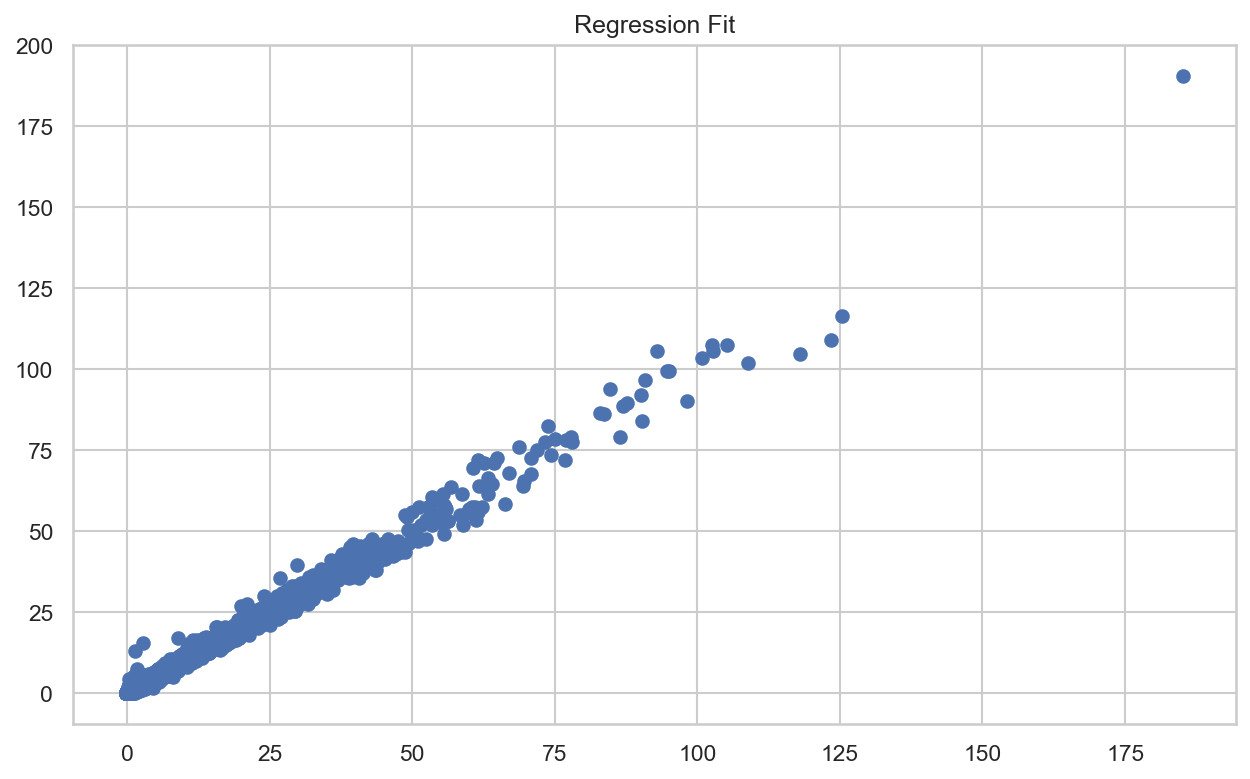

In [65]:
# Regression Fit
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,Ys);
pred = lr.predict(Xs)
plt.scatter(pred,Ys)
plt.title("Regression Fit")
plt.show()